In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from csv import writer
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

In [98]:
#organize 'student-mat' dataset
df_mat = open('student-mat.csv', 'r')
df = df_mat.readlines()
for i in range(396):
    header = []
    x = df[i].split(";")
    for j in x:
        c = re.sub('\W+','', j)
        header.append(c)
    with open('new_student-mat.csv','a',encoding='utf8', newline='') as f:
        thewriter = writer(f)
        thewriter.writerow(header)
    header = []

In [99]:
#organize 'student-por' dataset
df_mat = open('student-por.csv', 'r')
df = df_mat.readlines()
for i in range(650):
    header = []
    x = df[i].split(";")
    for j in x:
        c = re.sub('\W+','', j)
        header.append(c)
    with open('new_student-por.csv','a',encoding='utf8', newline='') as f:
        thewriter = writer(f)
        thewriter.writerow(header)
    header = []

In [3]:
df_mat = pd.read_csv('new_student-mat.csv')
df_mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
df_mat.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
df_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
df_por = pd.read_csv('new_student-por.csv')
df_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [7]:
df_por.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
df_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


Text(0.5, 0, 'G3')

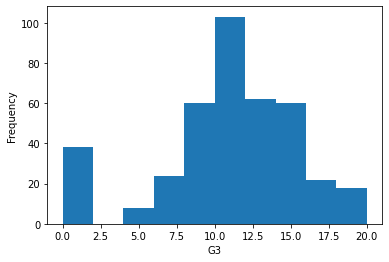

In [112]:
#Univariate analysis(student-mat)
df_mat['G3'].plot(kind='hist')
plt.xlabel('G3')

Text(0.5, 0, 'G3')

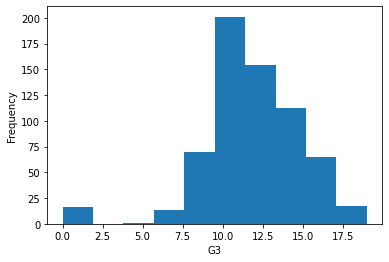

In [113]:
#Univariate analysis(student-por)
df_por['G3'].plot(kind='hist')
plt.xlabel('G3')

In [26]:
#concat
df = pd.concat([df_mat,df_por])
df.shape

(1044, 33)

Text(0.5, 0, 'G3')

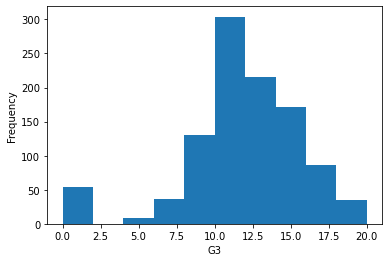

In [27]:
#mat and por
df['G3'].plot(kind='hist')
plt.xlabel('G3')

Text(0.5, 1.0, 'Correlation Heatmap')

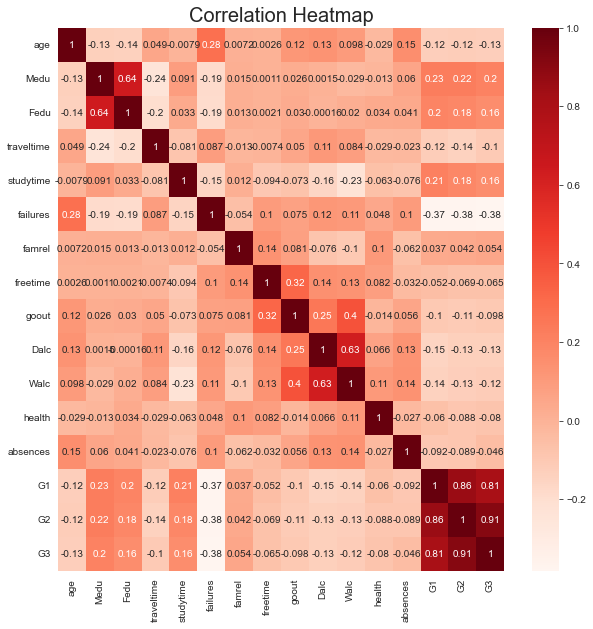

In [32]:
# see correlation between variables through a correlation heatmap
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

# Check the summary if Mother's education and Father's education effects Final grade of their child

In [31]:
# use OLS to see coefficients
X_edu = df[['Medu','Fedu']]
y_edu = df.G3
edu = sm.OLS(y_edu, X_edu)
results_edu = edu.fit()
results_edu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     G3   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.814
Method:                 Least Squares   F-statistic:                              2287.
Date:                Tue, 21 Mar 2023   Prob (F-statistic):                        0.00
Time:                        19:44:10   Log-Likelihood:                         -3194.8
No. Observations:                1044   AIC:                                      6394.
Df Residuals:                    1042   BIC:                                      6403.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Medu           2.4078      0.166     14.527      0.000       2.083       2.733
Fedu           1.5746      0.179      8.806      0.000       1.224       1.926
==============================================================================
Omnibus:                       35.858   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.773
Skew:                          -0.427   Prob(JB):                     2.31e-09
Kurtosis:                       3.430   Cond. No.                         5.72
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Check and scatter plot between G1, G2 and G3 Using Simple Linear Regression

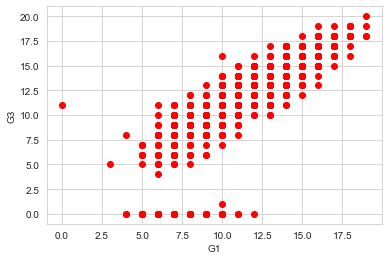

In [40]:
#linear regression for 2 variables(G1 and G3)
from sklearn import linear_model
%matplotlib inline
plt.xlabel('G1')
plt.ylabel('G3')
plt.scatter(df.G1,df.G3, color='red')

In [41]:
reg = linear_model.LinearRegression()
reg.fit(df[['G1']],df.G3)

LinearRegression()

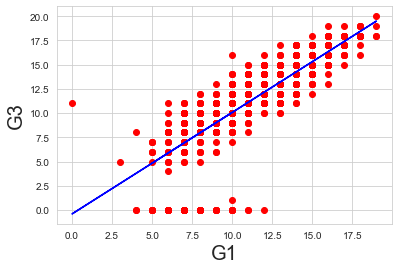

In [43]:
%matplotlib inline
plt.xlabel('G1', fontsize = 20)
plt.ylabel('G3', fontsize =20)
plt.scatter(df.G1,df.G3, color='red')
plt.plot(df.G1, reg.predict(df[['G1']]),color='blue')

In [47]:
print('G3: ',reg.predict([[16]])) #16 is G1

G3:  [16.35901519]


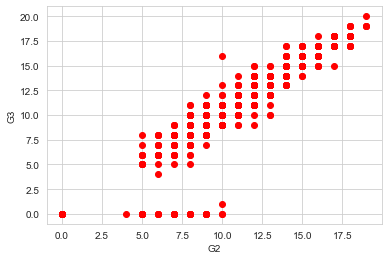

In [48]:
#linear regression for 2 variables(G2 and G3)
from sklearn import linear_model
%matplotlib inline
plt.xlabel('G2')
plt.ylabel('G3')
plt.scatter(df.G2,df.G3, color='red')

In [52]:
reg = linear_model.LinearRegression()
reg.fit(df[['G2']],df.G3)

LinearRegression()

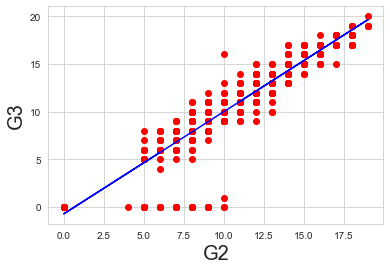

In [53]:
%matplotlib inline
plt.xlabel('G2', fontsize = 20)
plt.ylabel('G3', fontsize =20)
plt.scatter(df.G2,df.G3, color='red')
plt.plot(df.G2, reg.predict(df[['G2']]),color='blue')

In [54]:
print('G3: ',reg.predict([[16]])) #16 is G2

G3:  [16.43551465]
